In [1]:
import pandas as pd   
import numpy as np   
# 拉格朗日插值        
from scipy.interpolate import lagrange  #scipy.interpolate是内置工具包        
def ploy (s,n,k=5):        
    y=s[list(range(n-k,n))+list(range(n+1,n+1+k))] #取出插值位置前后k个数据  
    y=y[y.notnull()]  #剔除空值      
    return lagrange(y.index,list(y))(n)  
traj = pd.read_csv('DATASET-A.csv', usecols=[2,3,4]).iloc[:15]  

traj['time_interval'] = traj['timestamp'] - traj['timestamp'].shift(1)    
index = traj[traj['time_interval'] >=6].index.to_list() 
print(traj)
print(index)
for i in index:    
    timestamp = traj['timestamp'].loc[i-1] + 3    #第4组数据与第三组数据间隔过长，需要插入新数据
    insertRow = pd.DataFrame([[np.nan, np.nan, timestamp]], ignore_index=True, columns=['lon', 'lat', 'timestamp'])    
    print(insertRow)
    traj = pd.concat([traj[:i], insertRow, traj[i:]])   
    print(traj)
    traj['lon'][i]=ploy(traj['lon'],i)    
    traj['lat'][i]=ploy(traj['lat'],i)    
traj = traj.drop(['time_interval'], axis=1)

     timestamp         lon        lat  time_interval
0   1477964431  104.083327  30.659715            NaN
1   1477964434  104.083408  30.659839            3.0
2   1477964437  104.083610  30.660192            3.0
3   1477964440  104.083733  30.660382            3.0
4   1477964446  104.083976  30.660822            6.0
5   1477964449  104.084126  30.661081            3.0
6   1477964452  104.084254  30.661235            3.0
7   1477964455  104.084411  30.661533            3.0
8   1477964458  104.084543  30.661773            3.0
9   1477964461  104.084758  30.662083            3.0
10  1477964464  104.084903  30.662363            3.0
11  1477964467  104.085053  30.662587            3.0
12  1477964470  104.085194  30.662790            3.0
13  1477964473  104.085251  30.662956            3.0
14  1477964476  104.085394  30.663195            3.0
[4]


TypeError: __init__() got an unexpected keyword argument 'ignore_index'

In [4]:
from utm import *    
from tqdm import tqdm, tqdm_pandas
import pandas as pd
import numpy as np
import time 
time1 = '20161101 08:00:00'    
time2 = '20161101 09:00:00'
stamp1 = time.mktime(time.strptime(time1, "%Y%m%d %H:%M:%S")) 
stamp2 = time.mktime(time.strptime(time2, "%Y%m%d %H:%M:%S"))
df = pd.read_csv('DATASET-A.csv')  
df.columns=['driver_id', 'order_id', 'timestamp', 'lon', 'lat']
print(stamp1,stamp2)

# 转换为utc+8时区
df.timestamp = df.timestamp + 8 * 3600
print(df)
df = df[(df['timestamp'] >= stamp1) & (df['timestamp'] < stamp2)].reset_index(drop=True)
print (df)
print (df.head(10))


1477958400.0 1477962000.0
       driver_id  order_id   timestamp         lon        lat
0             42       844  1477993231  104.083327  30.659715
1             42       844  1477993234  104.083408  30.659839
2             42       844  1477993237  104.083610  30.660192
3             42       844  1477993240  104.083733  30.660382
4             42       844  1477993246  104.083976  30.660822
...          ...       ...         ...         ...        ...
17082         39       769  1477987603  104.071196  30.662970
17083         39       769  1477987606  104.071224  30.662995
17084         39       769  1477987609  104.071194  30.663006
17085         39       769  1477987612  104.071213  30.662999
17086         39       769  1477987613  104.071203  30.662997

[17087 rows x 5 columns]
Empty DataFrame
Columns: [driver_id, order_id, timestamp, lon, lat]
Index: []
Empty DataFrame
Columns: [driver_id, order_id, timestamp, lon, lat]
Index: []


In [9]:
!pip install osr

    ERROR: Command errored out with exit status 1:
     command: 'D:\Anaconda3\envs\Python37\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'D:\\TEMP\\pip-install-01djauja\\osr_be020f613e334416839e453d3da666cf\\setup.py'"'"'; __file__='"'"'D:\\TEMP\\pip-install-01djauja\\osr_be020f613e334416839e453d3da666cf\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'D:\TEMP\pip-pip-egg-info-eisxo5zu'
         cwd: D:\TEMP\pip-install-01djauja\osr_be020f613e334416839e453d3da666cf\
    Complete output (37 lines):
    ERROR: Could not find a version that satisfies the requirement filetype<2.0.0,>=1.0.7
    ERROR: No matching distribution found for filetype<2.0.0,>=1.0.7
    Traceback (most recent call last):
      File "D:\Anaconda3\envs\Python37\lib\site-packages\setuptools\installer.py", line 126, in fetch_build_egg
        subproc

In [10]:
import pandas as pd 
data = pd.read_csv('DATASET-B.csv')
data_speed = data[(data['date']==20161101) & (data['time_id']==0)]['aveSpeed']
statistics = data_speed.describe()#保存基本统计量      
statistics.loc['range']=statistics.loc['max']-statistics.loc['min']#极差 
statistics.loc['var']=statistics.loc['std']/statistics.loc['mean']#变异系数  
statistics.loc['dis']=statistics.loc['75%']-statistics.loc['25%']#四分位数间距 
print (statistics)
statistics.to_csv('statistics.csv')

count    280.000000
mean      11.198390
std        4.324579
min        2.971443
25%        7.873805
50%       11.523610
75%       14.688217
max       18.483186
range     15.511743
var        0.386179
dis        6.814412
Name: aveSpeed, dtype: float64


In [12]:
import pandas as pd
data = pd.read_csv('DATASET-B.csv')
data_vol = data[data['time_id']==50].groupby(['date'])['volume'].sum()
df = pd.DataFrame(data_vol)
df = df.reset_index(drop=False)

from datetime import datetime
df['day'] = df['date'].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").weekday()+1)
# weekday()函数返回值：周一为0，周日为6
print(df)

        date  volume  day
0   20161101   16598    2
1   20161102   17873    3
2   20161103   18608    4
3   20161104   20113    5
4   20161105   16702    6
5   20161106   12277    7
6   20161107   15546    1
7   20161108   19145    2
8   20161109   18398    3
9   20161110   19217    4
10  20161111   20131    5
11  20161112   15823    6
12  20161113   11538    7
13  20161114   19187    1
14  20161115   19882    2
15  20161116   19823    3
16  20161117   20493    4
17  20161118   24822    5
18  20161119   16425    6
19  20161120   13750    7
20  20161121   19364    1
21  20161122   22212    2
22  20161123   19916    3
23  20161124   22247    4
24  20161125   21261    5
25  20161126   16216    6
26  20161127   14761    7
27  20161128   22406    1
28  20161129   22582    2
29  20161130   21565    3


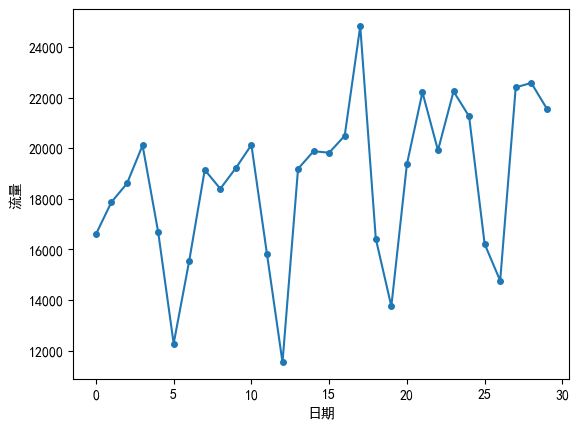

In [23]:
import numpy as np    
import pandas as pd    
import matplotlib.pyplot as plt    
import seaborn as sns    

plt.rcParams['axes.unicode_minus'] = False    
plt.rcParams['font.sans-serif'] = 'SimHei'   

x = np.arange(0,30)
plt.plot(x, df['volume'],marker='o', markersize=4)    
plt.xlabel('日期')      
plt.ylabel('流量')   
plt.show()